# Solution to the banana navigation problem:

---

This notebook provides a solution to the Unity banana navigation environment.

### 1. Starting the Environment

We commence by importing the required packages. (Notice that dqn_agent.py encapsulates the details of the agent.):

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from dqn_agent import Agent

In the next step, we start the environment:

In [2]:
env = UnityEnvironment(file_name="Banana.app",worker_id=1, seed=1,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain brains deciding which actions the agents should take. Here, the first brain available is set as the default brain.



In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examination of the state and action spaces

In this problem a single agent explores a large environment.  It can choose from four different actions at each time step corresponding to moving forward, backward, left and right. The state space has `37` dimensions. The agent receives a reward of `+1` when a yellow banana is collected and a reward of `-1` when a blue banana is collected.

The following cell contains some overview information about the environment:

In [4]:
# We reset the environment. The training mode is on.
env_info = env.reset(train_mode=True)[brain_name]

# We print the number of agents in our environment.
print('Number of agents:', len(env_info.agents))

# We request the number of actions and print it.
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# We further examine the state space and print the type and number of states.
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.27946243 0.
 1.         0.         0.         0.74556106 0.         0.
 1.         0.         0.48277503 0.         1.         0.
 0.         0.30341193 0.         0.         1.         0.
 0.46494457 0.         0.         1.         0.         0.08466676
 0.         1.         0.         0.         0.95967758 0.
 0.        ]
States have length: 37


### 3. Training of the agent

The following function is responsible for the training of the agent. The agent is trained so that it uses its experience to gradually choose better actions over time. Once the agent reaches an average score of 13.0 over 100 consecutive episodes, the learned weights are saved to the checkpoint_dqn.pth file and we are done.

In [5]:
def dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """This function is responsible for implementing the training of the agent 
    accoring to the Deep Q-Learning algorithm.
    
    Arguments of the function:
    ======
        n_episodes (int): This is the maximum number of training episodes.
        max_t (int): This is the maximum number of timesteps per episode allowed for the agent to explore.
        eps_start (float): This is starting value of epsilon. We follow an epsilon-greedy action selection.
        eps_end (float): This is the minimum value of epsilon.
        eps_decay (float): This defines a multiplicative factor needed for decreasing epsilon per episode.
    """
    
    # First we reset the environment.
    env_info = env.reset(train_mode=True)[brain_name]
    # Then we get the current state from the environment.
    state = env_info.vector_observations[0] 
    
    # We define a list which contains the scores from each episode. It will be filled below.
    scores = []
    # We define scores_window to save the last 100 scores in a list-like container 'deque'.
    scores_window = deque(maxlen=100)
    # We initialize epsilon.
    eps = eps_start                    
    
    
    # We proceed with the essential loop for the learning algorithm. The agent acts per episode for a given number of time steps and collects rewards.
    for i_episode in range(1, n_episodes+1):
       
        # Per episode we have to reset the environment.
        env_info = env.reset(train_mode=True)[brain_name]
        # Per episode we have to get the current state.
        state = env_info.vector_observations[0]         
        
        # We set the current score to 0.
        score = 0
        
        
        # This is the internal loop which encapsulates the acting of the agent in each episode through the time steps.
        for t in range(max_t):
            
            action = agent.act(state, eps)
            # We send the action to the environment to proceed with a step.
            env_info = env.step(action)[brain_name]
            # We obtain the next state.
            next_state = env_info.vector_observations[0]
            # We get the reward.
            reward = env_info.rewards[0]
            # We get the done status.
            done = env_info.local_done[0]
            
            # The agent takes the next step (as specified in the attached dqn_agent.py file).
            agent.step(state, action, reward, next_state, done)
            
            # We update the state.
            state = next_state
            # We update the score value.
            score += reward
            
            # If the status is done (completed) we stop this episode. Otherwise the agent continues with the exploration.
            if done:
                break 
                
        
        # With the next two lines we save most recent score.
        scores_window.append(score)
        scores.append(score)      
        # We decrease the magnitude of epsilon per i_episode.
        eps = max(eps_end, eps_decay*eps)
        
        # We print the average score at the corresponding number of episodes. This value is overwritten at each new episode.
        print('\rEpisode: {}\tAverage Score: {:.2f}\tsteps: {}\tepsilon: {}'.format(i_episode, np.mean(scores_window),t,eps), end="")
        
        # We print the average score every 100 number of episodes and keep the print.
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # If the average score exceeds 13.0 the training is stopped and we print the corresponding number of episodes.
        # We also do save the trained network weights in the 'checkpoint.pth' file
        if np.mean(scores_window)>=13.0:
            print('\n With the given parameters the environment is solved in {:d} episodes. \tThe precise average score is {:.2f} there.'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    
    # We return the desired scores output (to plot later on).
    return scores

We proceed with the actual training of the agent. A plot of rewards per episode is included which illustrates that the agent is able to receive an average reward (over 100 episodes) of at least +13.0. We also report the number of episodes which are needed to solve the environment. 

Training run 1: @ eps_decay=0.995

In [ ]:
# Define moving average functions for plotting.
# moving averages https://www.quora.com/How-do-I-perform-moving-average-in-Python
def movingaverage(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values,weights,'valid')
    return smas

def ExpMovingAverage(values,window):
    weights = np.exp(np.linspace(-1.,0.,window))
    weights /= weights.sum()
    
    emas = np.convolve(values,weights)[:len(values)]
    emas[:window] = emas[window]
    return emas


def Gaussianwindowsaverage(values):
    gaussian_func = lambda x, sigma: 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x**2)/(2*sigma**2))
    # Compute moving averages using window size sigma_lst
    sigma_lst = 5
    y_gau = np.zeros((1, len(values)))

    gau_x = np.linspace(-2.7*sigma_lst, 2.7*sigma_lst, 6*sigma_lst)
    gau_mask = gaussian_func(gau_x, sigma_lst)
    y_gau = np.convolve(values, gau_mask, 'same')
    
    return y_gau
    

In [ ]:
# We call the Agent class from dqn_agent.py and then call the learning algorithm.
agent = Agent(state_size=37, action_size=4, seed=0)
scores1 = dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

# We plot the scores over the number of episodes.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(scores1, 'b', lw=1)
plt.plot(movingaverage(scores1,5), 'g', lw=2)
plt.plot(ExpMovingAverage(scores1,5), 'y', lw=2)
plt.plot(Gaussianwindowsaverage(scores1),'m',lw=2)
plt.plot([0, len(scores1)], [13, 13], 'r', lw=2)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Training run 2: @ eps_decay=0.95 (The agent follows a greedier policy than in Training run 1 (above) and the soft update parameter \theta was increased in the dqn_agent.py file to 5e-3.)

In [6]:
# Define moving average functions for plotting.
def movingaverage(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values,weights,'valid')
    return smas

def ExpMovingAverage(values,window):
    weights = np.exp(np.linspace(-1.,0.,window))
    weights /= weights.sum()
    
    emas = np.convolve(values,weights)[:len(values)]
    emas[:window] = emas[window]
    return emas

def Gaussianwindowsaverage(values):
    gaussian_func = lambda x, sigma: 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x**2)/(2*sigma**2))
    # Compute moving averages using window size sigma_lst
    sigma_lst = 5
    y_gau = np.zeros((1, len(values)))

    gau_x = np.linspace(-2.7*sigma_lst, 2.7*sigma_lst, 6*sigma_lst)
    gau_mask = gaussian_func(gau_x, sigma_lst)
    y_gau = np.convolve(values, gau_mask, 'same')
    
    return y_gau

Episode 100	Average Score: 2.311	steps: 299	epsilon: 0.01408804957535735
Episode 200	Average Score: 11.011	steps: 299	epsilon: 0.01
Episode 300	Average Score: 12.744	steps: 299	epsilon: 0.01
Episode: 318	Average Score: 13.00	steps: 299	epsilon: 0.01
 With the given parameters the environment is solved in 318 episodes. 	The precise average score is 13.00 there.


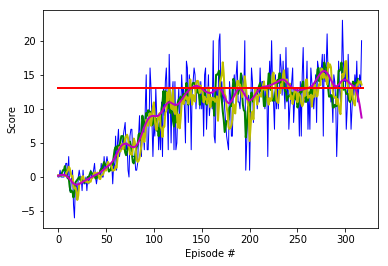

In [7]:
# We call the Agent class from dqn_agent.py and then call the learning algorithm.
agent = Agent(state_size=37, action_size=4, seed=0)
scores2 = dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.95)

# We plot the scores over the number of episodes.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(scores2, 'b', lw=1)
plt.plot(movingaverage(scores2,5), 'g', lw=2)
plt.plot(ExpMovingAverage(scores2,5), 'y', lw=2)
plt.plot(Gaussianwindowsaverage(scores2),'m',lw=2)
plt.plot([0, len(scores2)], [13, 13], 'r', lw=2)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Closing the environment

In the last step, we close the environment.

In [ ]:
env.close()